In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from seaborn import heatmap
from sklearn import tree
import seaborn as sns
from keras.models import Sequential
import preprocessing as pp

In [2]:
#Aufruf py file

Y_df_train, X_df_train = pp.preprocessing()
Y_df_test, X_df_test = pp.preprocessing("test.csv")

=========== START PREPROCESSING =================
========= Loaded data and sorted category=============
========= Removed outliers =============
========= Removed duplicated rows =============
========= Factorized our Y =============
========= Factorized our DayOfWeek =============
========= Start K-Means =============
========= End K-Means =============
========= Mapped cluster-centers =============
========= Created feature weekend =============
========= Generated basic X =============
========= One hot Encoded PdDistrict =============
========= Addeds features to X from address =============
========= Imported weather-data =============
========= One hot Encoded conditions =============
=========== END PREPROCESSING =================
=========== START PREPROCESSING =================
========= Loaded data and sorted category=============
========= Removed outliers =============
========= Removed duplicated rows =============
========= Factorized our Y =============
========= Factor

In [3]:
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(Y_df_train[0]), y=Y_df_train[0])
class_weight = {v: k for v, k in enumerate(class_weight)}
class_weight

{0: 0.5328522408286036,
 1: 0.17827743401217117,
 2: 0.12881325763342918,
 3: 0.41813872044611194,
 4: 0.5036517467876822,
 5: 0.2442884406849547,
 6: 0.9767605547394124,
 7: 0.29231223225572994,
 8: 2.62605787974209,
 9: 0.6134811025381806,
 10: 0.7152393881178285,
 11: 5.24965977830135,
 12: 2.119788035479123,
 13: 0.41641712331079717,
 14: 4.949910686021797,
 15: 2.250004496622394,
 16: 3.0685793182718153,
 17: 0.8747046971753817,
 18: 1.349569926777356,
 19: 9.595211483673022,
 20: 11.854696342024747,
 21: 9.899821372043593,
 22: 5.127379509430206,
 23: 3.0154169851994186,
 24: 5.208256755229615,
 25: 14.849732058065392,
 26: 46.009825556956706,
 27: 11.82348334481036,
 28: 77.69133173631444,
 29: 19.289342673363294,
 30: 44.19841510195841,
 31: 18.602149852356977,
 32: 151.70807345807347,
 33: 87.70622996794872,
 34: 153.78626624517037,
 35: 55.30245042314008,
 36: 3742.1324786324785,
 37: 7.1688361659626025,
 38: 1020.5815850815851}

In [18]:
#X_df_train = (X_df_train - X_df_train.mean())/ X_df_train.std()
#X_df_test = (X_df_test - X_df_train.mean())/ X_df_train.std()

X_df_train=(X_df_train-X_df_train.min())/(X_df_train.max()-X_df_train.min())
X_df_test=(X_df_test-X_df_train.min())/(X_df_train.max()-X_df_train.min())

In [16]:
from keras.utils import to_categorical

to_categorical(
    Y_df_train[0], num_classes=None, dtype='float32'
)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
Y = np.zeros((Y_df_train[0].size, Y_df_train[0].max() + 1))
Y[np.arange(Y_df_train[0].size), Y_df_train[0]] = 1
Y[:5]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.]])

In [6]:
X_df_train.columns

Index(['DayOfWeek', 'Weekend', 'CoordinateClusters', 'X', 'Y', 'year', 'month',
       'quarter', 'hour', 'minute', 'NORTHERN', 'PARK', 'INGLESIDE', 'BAYVIEW',
       'RICHMOND', 'CENTRAL', 'TARAVAL', 'TENDERLOIN', 'MISSION', 'SOUTHERN',
       'ST', 'AV', 'WY', 'TR', 'DR', 'Block', 'crossing', 'temp',
       'Partially cloudy', 'Clear', 'Rain, Partially cloudy', 'Overcast',
       'Rain, Overcast', 'Rain', 'X_centroids', 'Y_centroids'],
      dtype='object')

In [20]:
from keras.models import Sequential
from keras.layers import Input, Flatten, Dense, Dropout

model = Sequential()

#220, 110, 0.2
model.add(Input(shape=X_df_train.shape[1]))
model.add(Dense(1028, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(39, activation='softmax'))

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1028)              38036     
                                                                 
 dropout_6 (Dropout)         (None, 1028)              0         
                                                                 
 dense_9 (Dense)             (None, 512)               526848    
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 39)               

In [21]:
model.compile(loss="categorical_crossentropy", optimizer="adam")

In [22]:
from keras.callbacks import EarlyStopping, LearningRateScheduler
early_stopping = EarlyStopping(
    monitor="val_loss",
    mode="min",
    patience=10,
)

In [23]:
import math

initial_learning_rate = 0.1
epochs = 100
decay = initial_learning_rate / epochs

def lr_time_based_decay(epoch, lr):
    return lr * 1 / (1 + decay * epoch)

history = model.fit(
  X_df_train,
  Y,
  batch_size=400,
  epochs=10,
  verbose=1,
  validation_split=.2,
  class_weight=class_weight,
  #callbacks=[early_stopping, LearningRateScheduler(lr_time_based_decay, verbose=1)]
)


Epoch 1/10
1752/1752 [==============================] - 72s 41ms/step - loss: 3.7132 - val_loss: 3.5136
Epoch 2/10
1752/1752 [==============================] - 64s 36ms/step - loss: 3.6092 - val_loss: 3.4364
Epoch 3/10
1752/1752 [==============================] - 64s 37ms/step - loss: 3.6688 - val_loss: 3.4591
Epoch 4/10
1752/1752 [==============================] - 62s 35ms/step - loss: 3.7377 - val_loss: 3.5181
Epoch 5/10
1752/1752 [==============================] - 74s 42ms/step - loss: 3.7083 - val_loss: 3.4854
Epoch 6/10
1752/1752 [==============================] - 69s 39ms/step - loss: 3.6323 - val_loss: 3.4614
Epoch 7/10
1752/1752 [==============================] - 72s 41ms/step - loss: 3.6836 - val_loss: 3.4894
Epoch 8/10
1752/1752 [==============================] - 86s 49ms/step - loss: 3.7542 - val_loss: 3.5009
Epoch 9/10
1752/1752 [==============================] - 71s 40ms/step - loss: 3.8206 - val_loss: 3.4873
Epoch 10/10
1752/1752 [==============================] - 65s 37m

In [24]:
m = model.predict(X_df_test)

27631/27631 [==============================] - 91s 3ms/step


In [25]:
max(m[0])

0.1497665

In [26]:
import keras
def plot_history(history: keras.callbacks.History):
  """
  plot the training and validation loss for each training epoch

  history: a History object, output of the .fit method of a keras model
  """
  n = len(history.history['loss'])
  plt.plot(np.arange(n), history.history['loss'], label="training loss")
  plt.plot(np.arange(n), history.history['val_loss'], label="validation loss")
  plt.xticks(range(0, n + 1, 2))
  plt.legend()
  plt.show()

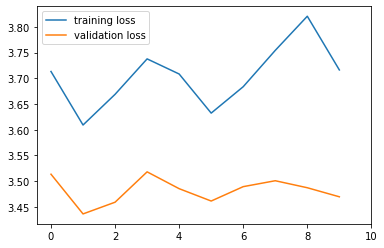

In [27]:
plot_history(history)

#### GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=150, max_depth=8, random_state=0).fit(x_train, y_train)


In [ ]:
y_preds = clf.predict_proba(x_test)
test_log_loss = log_loss(y_test, y_preds)
print("Testing Log Loss:", test_log_loss)

#### RandomForestClassifier

In [70]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=100, random_state=0, class_weight="balanced",n_estimators=150)
clf.fit(X_df_train, Y)

y_pred = clf.predict(X_df_test)


RandomForestClassifier(class_weight='balanced', max_depth=100, n_estimators=150,
                       random_state=0)

In [71]:
from sklearn.metrics import log_loss


y_preds = clf.predict_proba(X_df_test)
test_log_loss = log_loss(y_test, y_preds)
print("Testing Log Loss:", test_log_loss)


Testing Log Loss: 3.440130711844978
